In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split

### Read the data using pandas 

In [3]:
mnist = pd.read_csv(r'C:\Users\Shan\Digit classifier\Digit classification in ML - random forest/train.csv')

### Observe some parts of the data 

In [4]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist.shape

(42000, 785)

### Prepare the data 

In [6]:
X = mnist.drop('label', axis = 1)
y = mnist["label"]

In [7]:
train_images, test_images,train_labels, test_labels = train_test_split(X, y, train_size=0.8, random_state=0)

In [8]:

print(train_images.shape) 
print(test_images.shape) 
print(train_labels.shape) 
print(test_labels.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [9]:
train_images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_images = train_images / 255
test_images = test_images / 255

### Let's print a random image from the dataset 

Text(0.5, 1.0, '0')

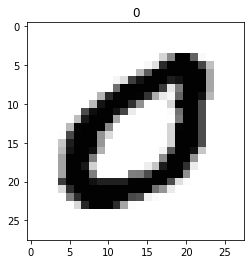

In [11]:
i = 400
img=train_images.iloc[i].to_numpy()
img = img.reshape((28,28))
plt.imshow(255-img, cmap = "gray")
plt.title(train_labels.iloc[i])

### Now I would build a Random forrest classifier using the sklearn module but any other classifier can also be used. 
Here the clf.fit is for training the model with our training data 

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, n_estimators=14)
clf.fit(train_images,train_labels)

RandomForestClassifier(n_estimators=14, n_jobs=-1)

In [15]:
score = clf.score(test_images,test_labels)
print("accuracy", round(score,2)*100)

accuracy 95.0


In [16]:
i = 89
img = test_images.iloc[i].to_numpy()
clf.predict(img.reshape(1,-1))

array([8], dtype=int64)

Text(0.5, 1.0, '8')

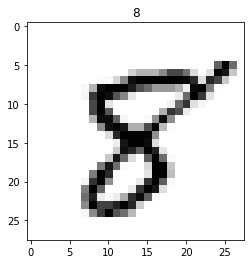

In [17]:
img=test_images.iloc[i].to_numpy()
img = img.reshape((28,28))
plt.imshow(255-img, cmap = "gray")
plt.title(test_labels.iloc[i])

### Now lets use the model to predict on the test set provided from the kaggle website 

In [18]:
test_dataset = pd.read_csv(r'C:\Users\Shan\Digit classifier\Digit classification in ML - random forest/test.csv')

In [19]:
predictions = clf.predict(test_dataset)

In [25]:
print(len(predictions))

28000


In [26]:
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
submission = pd.read_csv(r'C:\Users\Shan\Digit classifier\sample_submission.csv')

In [33]:
submission["Label"] = predictions

In [34]:
submission.head()

,ImageId,Label,label
0,1,2,2
1,2,0,0
2,3,9,9
3,4,2,2
4,5,2,2


In [43]:
submission.drop(['label'],axis = 1, inplace = True)

In [44]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


In [46]:
submission.to_csv('Final submission.csv', index = False)